# EDA Project on Stock Market Analysis

#Import all required libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import time

# Data Extraction using Requests module & API(Application Programming Interface)

In [132]:
TICKERS = [
    "INFY.NS", "TCS.NS", "HCLTECH.NS", "WIPRO.NS", "TECHM.NS","HDFCBANK.NS","ICICIBANK.NS","SBIN.NS","KOTAKBANK.NS","AXISBANK.NS"
]
PERIOD2 = int(time.time())                   # today (epoch seconds)
PERIOD1 = PERIOD2 - 365 * 24 * 60 * 60       # 1 year ago
BASE_URL = "https://query1.finance.yahoo.com/v8/finance/chart/{}"
HEADERS = {"User-Agent": "Mozilla/5.0"}

def fetch_one(ticker):
    url = (
        f"{BASE_URL.format(ticker)}"
        f"?period1={PERIOD1}&period2={PERIOD2}&interval=1d"
    )
    data = requests.get(url, headers=HEADERS, timeout=15).json()
    snap = data["chart"]["result"][0]
    ts   = snap["timestamp"]
    ohlc = snap["indicators"]["quote"][0]
    return pd.DataFrame({
        "date": pd.Series(pd.to_datetime(ts, unit="s")).dt.date,
        **ohlc
    })

# --- download & stitch ------------------------------------------------------
frames = {t: fetch_one(t) for t in TICKERS}
df  = pd.concat(frames, names=["ticker", "row"]).reset_index(level="ticker")

# tidy column order
df = df[["ticker", "date", "open", "high", "low", "close", "volume"]]

print(df.head())

      ticker        date         open         high          low        close  \
row                                                                            
0    INFY.NS  2024-07-05  1651.449951  1665.849976  1633.349976  1647.449951   
1    INFY.NS  2024-07-08  1643.099976  1666.000000  1640.000000  1661.650024   
2    INFY.NS  2024-07-09  1659.900024  1666.750000  1651.000000  1657.150024   
3    INFY.NS  2024-07-10  1657.000000  1674.000000  1637.550049  1648.250000   
4    INFY.NS  2024-07-11  1656.000000  1665.000000  1642.050049  1652.699951   

      volume  
row           
0    7065022  
1    5880533  
2    5191182  
3    9852770  
4    8857679  


In [133]:
# Data Frame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2490 entries, 0 to 248
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  2490 non-null   object 
 1   date    2490 non-null   object 
 2   open    2490 non-null   float64
 3   high    2490 non-null   float64
 4   low     2490 non-null   float64
 5   close   2490 non-null   float64
 6   volume  2490 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 155.6+ KB


# Data Cleaning

In [135]:
#Data Types Converting

df['date'] = pd.to_datetime(df['date'])   # date column is changed form object to Datetime

In [136]:
# Null Values prediction
df.isnull().sum()

ticker    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [137]:
df.duplicated().sum()

0

C:\Users\RiyaVarshi\AppData\Local\Temp\ipykernel_22544\1238033323.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x="ticker",y="high",palette="muted")
C:\Users\RiyaVarshi\AppData\Local\Temp\ipykernel_22544\1238033323.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x="ticker",y="low",palette="muted")
C:\Users\RiyaVarshi\AppData\Local\Temp\ipykernel_22544\1238033323.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x="ticker",y="open",palette="muted")
C:\Users\RiyaVarshi\AppData\Local\Temp\ipykernel_22544\1238033323.py:35:

<Figure size 2000x2000 with 0 Axes>

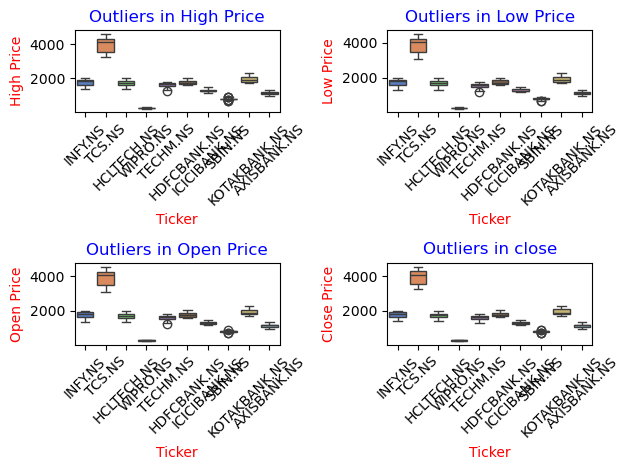

<Figure size 640x480 with 0 Axes>

In [138]:
# Outliers Predictions using Box plot
plt.figure(figsize=(20,20))
plt.subplots(2,2)

# Outliers in High Price Column
plt.subplot(2,2,1)
sns.boxplot(df,x="ticker",y="high",palette="muted")
plt.title("Outliers in High Price",color="b")
plt.xticks(rotation=45)
plt.xlabel("Ticker",color="r")
plt.ylabel("High Price",color="r")
plt.tight_layout()

# Outliers in Low  price Column
plt.subplot(2,2,2)
sns.boxplot(df,x="ticker",y="low",palette="muted")
plt.title("Outliers in Low Price",color="b")
plt.xticks(rotation=45)
plt.xlabel("Ticker",color="r")
plt.ylabel("Low Price",color="r")

plt.tight_layout()
# Outliers in Open price Column
plt.subplot(2,2,3)
sns.boxplot(df,x="ticker",y="open",palette="muted")
plt.title("Outliers in Open Price",color="b")
plt.xticks(rotation=45)
plt.xlabel("Ticker",color="r")
plt.ylabel("Open Price",color="r")

plt.tight_layout()

# Outliers in close price Column
plt.subplot(2,2,4)
sns.boxplot(df,x="ticker",y="close",palette="muted")
plt.title("Outliers in close",color="b")
plt.xticks(rotation=45)
plt.xlabel("Ticker",color="r")
plt.ylabel("Close Price",color="r")

plt.show()
plt.tight_layout()

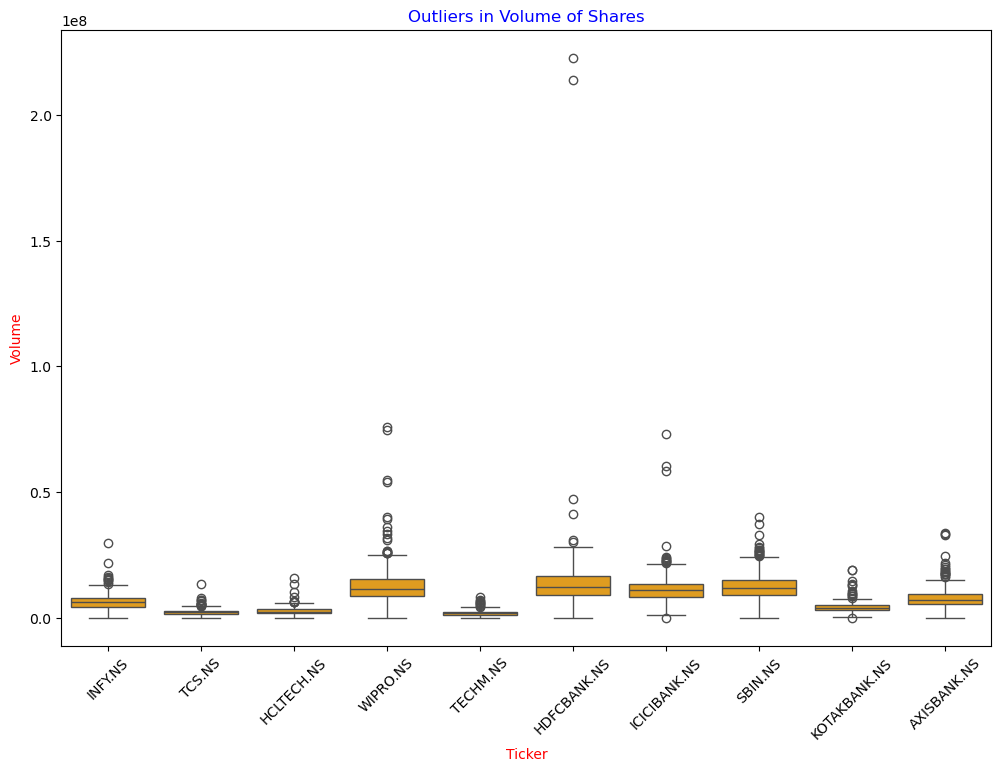

<Figure size 640x480 with 0 Axes>

In [139]:
# Outliers in Volume of Shares Column
plt.figure(figsize=(12,8))
sns.boxplot(df,x="ticker",y="volume",color="orange")
plt.title("Outliers in Volume of Shares",color="b")
plt.xticks(rotation=45)
plt.xlabel("Ticker",color="r")
plt.ylabel("Volume",color="r")
plt.show()
plt.tight_layout()

# Feature Engeneering Steps

In [141]:
# Day Name and Month Name Extract from date
df['day']   = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df["year"]=df["date"].dt.year

In [142]:
# Create new column 'sector'
banking_tickers = ['HDFCBANK.NS', 'ICICIBANK.NS', 'SBIN.NS', 'KOTAKBANK.NS', 'AXISBANK.NS']
it_tickers = ['TCS.NS', 'INFY.NS', 'WIPRO.NS', 'TECHM.NS', 'HCLTECH.NS']


df['sector'] = np.where(df['ticker'].isin(banking_tickers), 'Banking',
                        np.where(df['ticker'].isin(it_tickers), 'IT', 'Unknown'))

In [143]:
df['daily_change']      = df['close'] - df['open']            # It may be Positive/Negative
df['pct_change']        = df['close'].pct_change() * 100      # % change vs. prev. close
df['daily_range']       = df['high']  - df['low']             # Intraday volatility
df['return_range_ratio']= df['daily_range'] / df['close']

In [144]:
df.head()

,ticker,date,open,high,low,close,volume,day,month,year,sector,daily_change,pct_change,daily_range,return_range_ratio
row,,,,,,,,,,,,,,,
0,INFY.NS,2024-07-05,1651.449951,1665.849976,1633.349976,1647.449951,7065022,Friday,July,2024,IT,-4.000000,NaN,32.500000,0.019727
1,INFY.NS,2024-07-08,1643.099976,1666.000000,1640.000000,1661.650024,5880533,Monday,July,2024,IT,18.550049,0.861943,26.000000,0.015647
2,INFY.NS,2024-07-09,1659.900024,1666.750000,1651.000000,1657.150024,5191182,Tuesday,July,2024,IT,-2.750000,-0.270815,15.750000,0.009504
3,INFY.NS,2024-07-10,1657.000000,1674.000000,1637.550049,1648.250000,9852770,Wednesday,July,2024,IT,-8.750000,-0.537068,36.449951,0.022114
4,INFY.NS,2024-07-11,1656.000000,1665.000000,1642.050049,1652.699951,8857679,Thursday,July,2024,IT,-3.300049,0.269980,22.949951,0.013886


In [145]:
df.describe()

,date,open,high,low,close,volume,year,daily_change,pct_change,daily_range,return_range_ratio
count,2490,2490.000000,2490.000000,2490.000000,2490.000000,2.490000e+03,2490.00000,2490.000000,2489.000000,2490.000000,2490.000000
mean,2025-01-03 10:41:55.662650624,1622.125102,1638.274273,1606.644281,1622.254913,8.012423e+06,2024.51004,0.129811,0.211514,31.629992,0.019973
min,2024-07-05 00:00:00,231.050003,237.800003,228.000000,234.149994,0.000000e+00,2024.00000,-193.500000,-84.497944,0.000000,0.000000
25%,2024-10-04 00:00:00,1164.000000,1174.925018,1151.662506,1161.325043,2.845647e+06,2024.00000,-9.287537,-0.759858,16.762482,0.013441
50%,2025-01-03 00:00:00,1614.500000,1631.950012,1598.099976,1614.850037,6.322250e+06,2025.00000,0.000000,0.006965,26.325012,0.017916
75%,2025-04-03 00:00:00,1842.825012,1861.162506,1822.000031,1839.175049,1.102105e+07,2025.00000,9.049927,0.762455,39.699951,0.024095
max,2025-07-04 00:00:00,4576.000000,4592.250000,4512.000000,4553.750000,2.226710e+08,2025.00000,203.950195,441.140545,235.349854,0.077886
std,NaN,931.666869,940.400128,923.295589,931.199075,9.063364e+06,0.50000,23.156392,10.067940,23.835090,0.009195


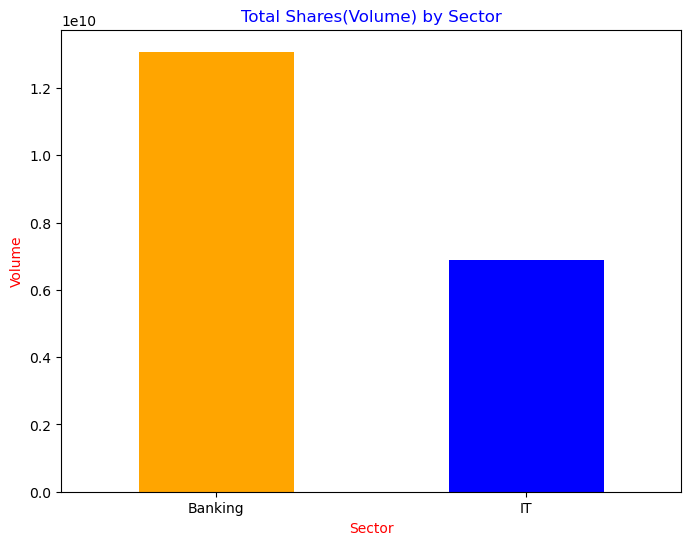

<Figure size 640x480 with 0 Axes>

In [146]:
# Q1 Total Shares(Volume) by Sector
plt.figure(figsize=(8,6))
df.groupby("sector")["volume"].sum().sort_values(ascending=False).plot(kind="bar",color=["orange","b"])
plt.title("Total Shares(Volume) by Sector",color="b")
plt.xlabel("Sector",color="r")
plt.ylabel("Volume",color="r")
plt.xticks(rotation=0)
plt.show()
plt.tight_layout()

# Observations
1. Banking stocks traded almost twice as many shares as IT stocks over the period.

2. Total volume was ≈ 12 billion shares for the five banking companies vs ≈ 7 billion shares for the five IT companies.

3. This indicates higher liquidity in banking stocks, meaning investors can enter or exit positions more easily and with lower transaction costs.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HDFCBANK.NS'),
  Text(1, 0, 'WIPRO.NS'),
  Text(2, 0, 'SBIN.NS'),
  Text(3, 0, 'ICICIBANK.NS'),
  Text(4, 0, 'AXISBANK.NS'),
  Text(5, 0, 'INFY.NS'),
  Text(6, 0, 'KOTAKBANK.NS'),
  Text(7, 0, 'HCLTECH.NS'),
  Text(8, 0, 'TCS.NS'),
  Text(9, 0, 'TECHM.NS')])

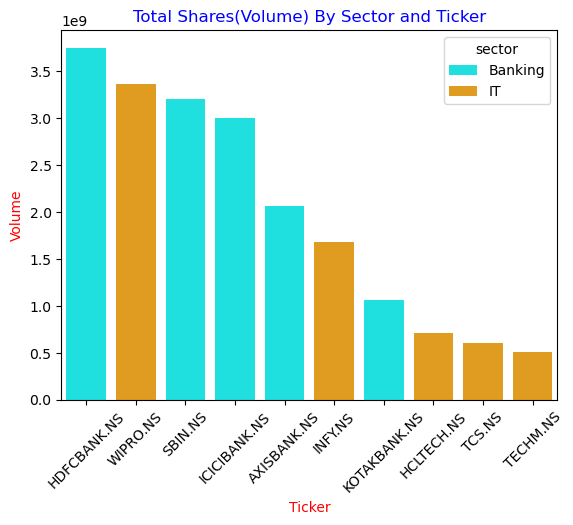

In [148]:
# Q2 Total Shares ( Volume) by Ticker and Sector
df_sort=df.groupby(["sector","ticker"])["volume"].sum().sort_values(ascending=False).reset_index()
sns.barplot(df_sort,x="ticker",y="volume",hue="sector",palette={"IT":"orange","Banking":"cyan"})
plt.title("Total Shares(Volume) By Sector and Ticker",color="b")
plt.xlabel("Ticker",color="r")
plt.ylabel("Volume",color="r")
plt.xticks(rotation=45)

# Observations
1. HDFC Bank had the highest trading activity among all companies, followed closely by Wipro, SBI, and ICICI Bank.

2. Banking stocks were traded more overall than IT stocks, showing higher investor interest in the banking sector.

3. Wipro was the most traded IT stock, with more volume than many banks — making it an exception in its sector.

4. Some IT stocks like Tech Mahindra and TCS had very low trading volume, which means they are less active in daily trading.

In [150]:
df_IT=df[df["sector"]=="IT"]
df_Banking=df[df["sector"]=="Banking"]

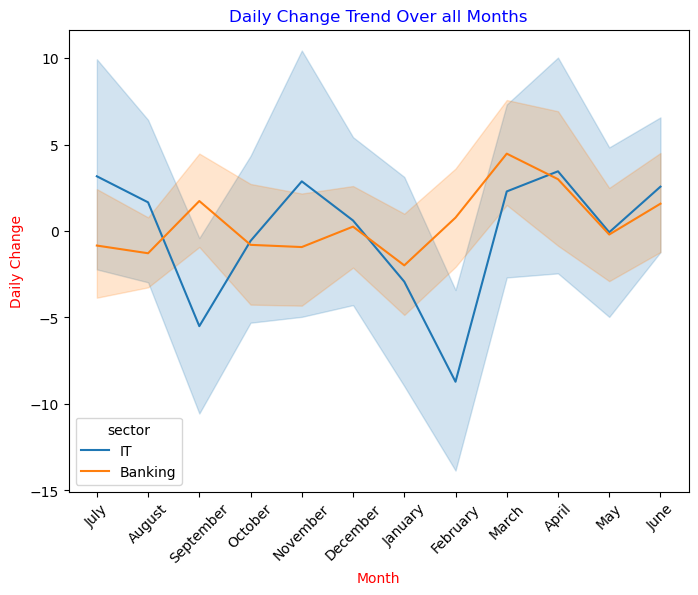

<Figure size 640x480 with 0 Axes>

In [151]:
# Q3 Daily Change by Sector over all months

plt.figure(figsize=(8,6))
sns.lineplot(df,x="month",y="daily_change",hue="sector",)
plt.title("Daily Change Trend Over all Months",color="b")
plt.xlabel("Month",color="r")
plt.ylabel("Daily Change",color="r")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

# Observations

**IT Sector**
1. IT Sector shows more **volatility**: The line fluctuates more sharply with larger positive and negative daily changes.
2. July and April show strong positive daily changes.

3. February has a sharp negative dip, likely indicating a market correction or sector-specific issue.
4. IT sector is likely higher-risk, higher-reward, as indicated by steeper ups and downs.



**Banking Sector**

1. Banking Sector appears **more stable**, with relatively smoother changes across months.
2. March and April show positive growth.

3. The sector remains mostly within ±5%, indicating lower volatility.

4. Banking sector shows a lower-risk, steady growth pattern,

<Figure size 800x600 with 0 Axes>

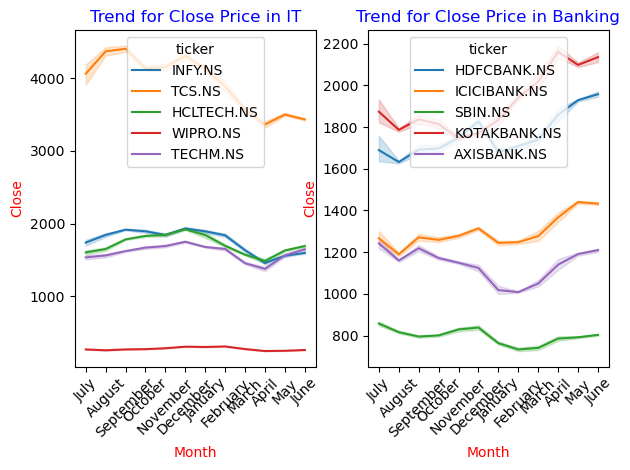

<Figure size 640x480 with 0 Axes>

In [153]:
# Q4 What is the trend of closing prices for all companies across the year?
plt.figure(figsize=(8,6))
plt.subplots(1,2)
plt.subplot(1,2,1)
sns.lineplot(df_IT,x="month",y="close",hue="ticker")
plt.title("Trend for Close Price in IT",color="b")
plt.xlabel("Month",color="r")
plt.ylabel("Close",color="r")
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplot(1,2,2)
sns.lineplot(df_Banking,x="month",y="close",hue="ticker")
plt.title("Trend for Close Price in Banking",color="b")
plt.xlabel("Month",color="r")
plt.ylabel("Close",color="r")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

# Observations

**IT Sector(Left Plot)**
1.  TCS.NS has the highest stock price, consistently above ₹4000.

2.  All IT stocks dip slightly after December, showing a downward trend until March.
3. WIPRO.NS maintains a flat trend with the lowest price among IT tickers.

4. Mid-range performers (INFY, HCLTECH, TECHM) show similar movement patterns.

**Banking Sector(Right Plot)**

1. KOTAKBANK.NS leads in price, reaching ~₹2200 in April.
2.  All banks hit a low around January–February, especially SBIN.NS and AXISBANK.NS.

3. Strong recovery after February, especially for HDFCBANK.NS and ICICIBANK.NS.

4. SBIN.NS has the lowest price, around ₹800, but shows steady movement.

5. More uniform trends across banking stocks compared to IT sector.



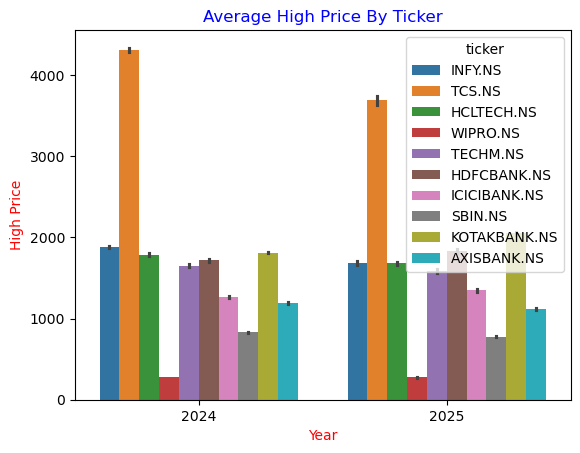

In [155]:
# Q5 Average High Prices per Year for all Tickers
sns.barplot(df,x="year",y="high",hue="ticker")
plt.title("Average High Price By Ticker",color="b")
plt.xlabel("Year",color="r")
plt.ylabel("High Price",color="r")
plt.show()

# Observations
1. TCS.NS has the highest average high price, regardless of sector or year.
2. WIPRO.NS has the lowest average high price among all 10 tickers.
3. Most stocks saw a decrease in high prices in 2025 compared to 2024.
4. KOTAKBANK.NS remains the top performer among banks in both years

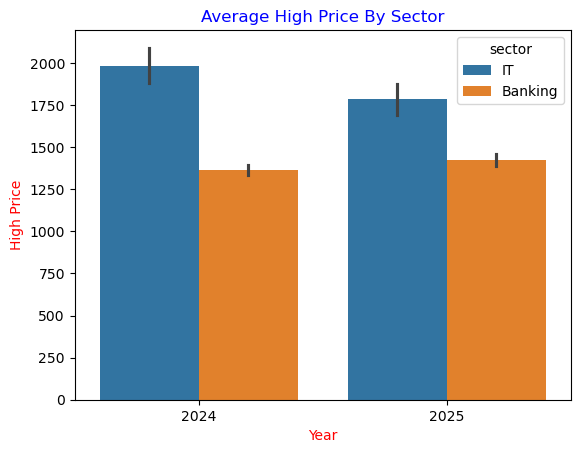

In [157]:
# Q6 Average High Price By Sector
sns.barplot(df,x="year",y="high",hue="sector")
plt.title("Average High Price By Sector",color="b")
plt.xlabel("Year",color="r")
plt.ylabel("High Price",color="r")
plt.show()

# Observations
1. IT sector had a higher average high price than Banking in both 2024 and 2025.

2. IT sector's average high price decreased in 2025 compared to 2024.

3. Banking sector's average high price slightly increased in 2025..

4. Banking sector shows more consistent performance, with smaller error bars (less variation among companies).

<Figure size 1200x600 with 0 Axes>

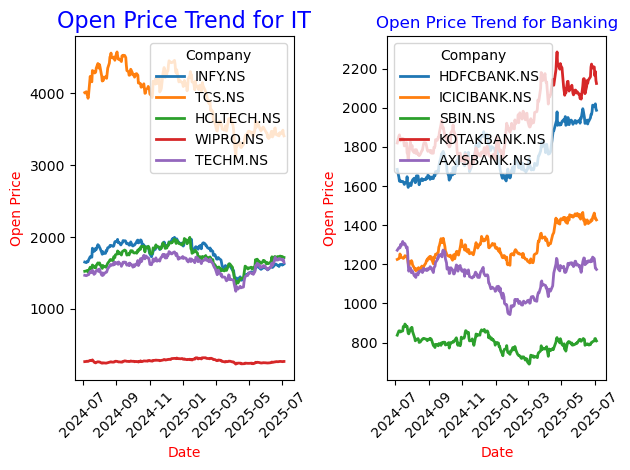

<Figure size 640x480 with 0 Axes>

In [159]:
# Q7 Open price Trend for Banking and IT Sectors
plt.figure(figsize=(12,6))
plt.subplots(1,2)

plt.subplot(1,2,1)
sns.lineplot(data=df_IT, x='date', y='open', hue='ticker', linewidth=2)
plt.title("Open Price Trend for IT", fontsize=16,color="b")
plt.xlabel("Date",color="r")
plt.ylabel("Open Price",color="r")
plt.legend(title='Company')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.lineplot(data=df_Banking, x='date', y='open', hue='ticker',linewidth=2)
plt.title("Open Price Trend for Banking",color="b")
plt.xlabel("Date",color="r")
plt.ylabel("Open Price",color="r")
plt.legend(title='Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

# Observations
**IT Sector**
1. TCS.NS had the highest opening prices, consistently above ₹4000.

2. WIPRO.NS remained flat and stable throughout the year with the lowest open price.

**Banking Sector**

1. KOTAKBANK.NS leads with the highest open price in the banking sector, rising steadily.

2. HDFCBANK.NS and ICICIBANK.NS also show a gradual upward trend.

3. SBIN.NS shows a declining trend until April, then slight recovery.

4. AXISBANK.NS shows fluctuations but ends with a higher price than its mid-year dip.

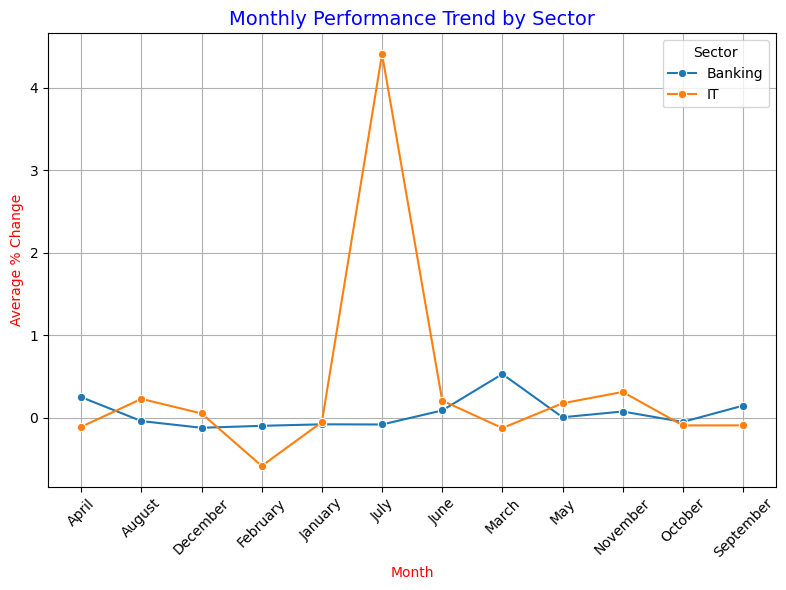

In [161]:
# Q8 How do Sectors perform Month Wise Over The Year.

# Group by sector and month, then compute average pct_change
monthly_sector_perf = df.groupby(['sector', 'month'])['pct_change'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=monthly_sector_perf, x='month', y='pct_change', hue='sector', marker='o')

plt.title("Monthly Performance Trend by Sector", fontsize=14, color='blue')
plt.xlabel("Month", color='r')
plt.ylabel("Average % Change", color='r')
plt.xticks(rotation=45)
plt.legend(title="Sector")
plt.grid(True)
plt.tight_layout()
plt.show()

# Observations
**IT Sector:**
1. **Big Swings**: This sector has really big ups and downs, especially that huge   jump in July.

2. **Quick Drop After Gains**: After its big moment in July, it quickly fell back down and stayed pretty low.

3. **Exciting but Unpredictable:** It can have amazing months, but it's not very steady and can often be negative.
**Banking Sector:**

1. **Very Steady**: This sector stays pretty much the same month after month, without big surprises.

2. **No Huge Changes**: You won't see it shoot up or crash down dramatically.

3. **Reliable, but Not Super Exciting**: It's a safe and consistent performer, but it doesn't give you huge returns quickly.

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2490 entries, 0 to 248
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ticker              2490 non-null   object        
 1   date                2490 non-null   datetime64[ns]
 2   open                2490 non-null   float64       
 3   high                2490 non-null   float64       
 4   low                 2490 non-null   float64       
 5   close               2490 non-null   float64       
 6   volume              2490 non-null   int64         
 7   day                 2490 non-null   object        
 8   month               2490 non-null   object        
 9   year                2490 non-null   int32         
 10  sector              2490 non-null   object        
 11  daily_change        2490 non-null   float64       
 12  pct_change          2489 non-null   float64       
 13  daily_range         2490 non-null   float64       
 14

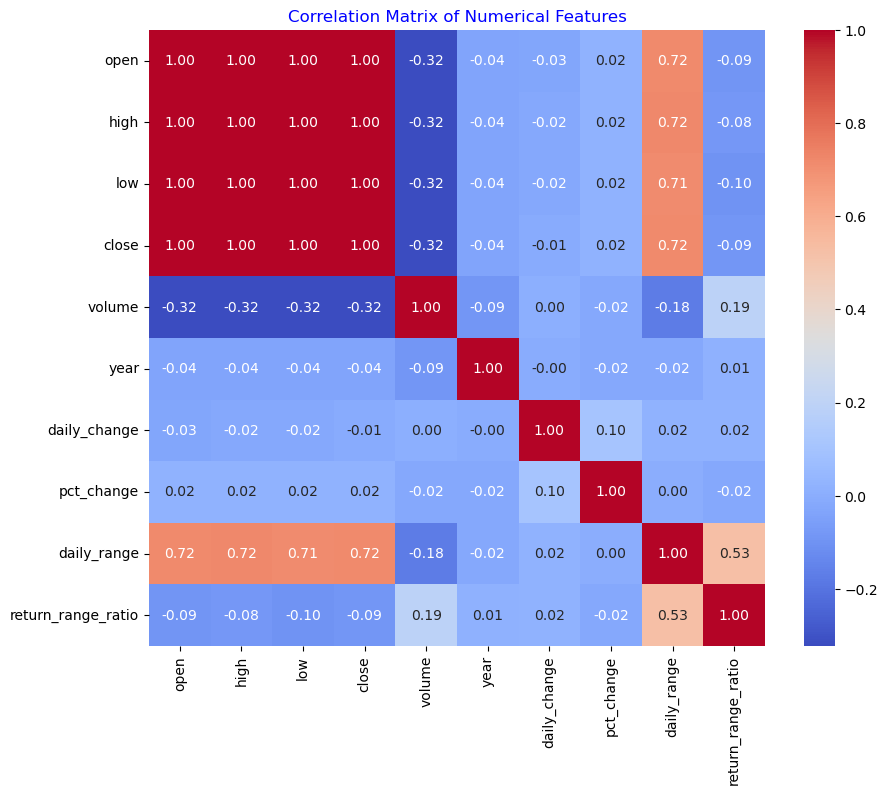

In [164]:
# Q 9 Correlation between all Numerical Columns

numeric_df = df.select_dtypes(include=["float", "int"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Numerical Features",color="b")
plt.show()

# Observations
1. Prices are Twins: "Open," "high," "low," and "close" prices are basically the same thing and always move together perfectly.

3. Daily Change is also a Twin: "daily_change" (how much price changed) and "pct_change" (percentage change) are identical.

4. Volume vs. Prices: When trading volume is higher, the "open," "high," "low," and "close" prices tend to be a little bit lower.

5. Daily Swings are Linked to Prices: How much the price moves in a day ("daily_range") is strongly connected to the actual "open," "high," "low," and "close" prices.

6. Year and Daily Changes Don't Matter: The "year" doesn't have much to do with daily price changes or trading volume.

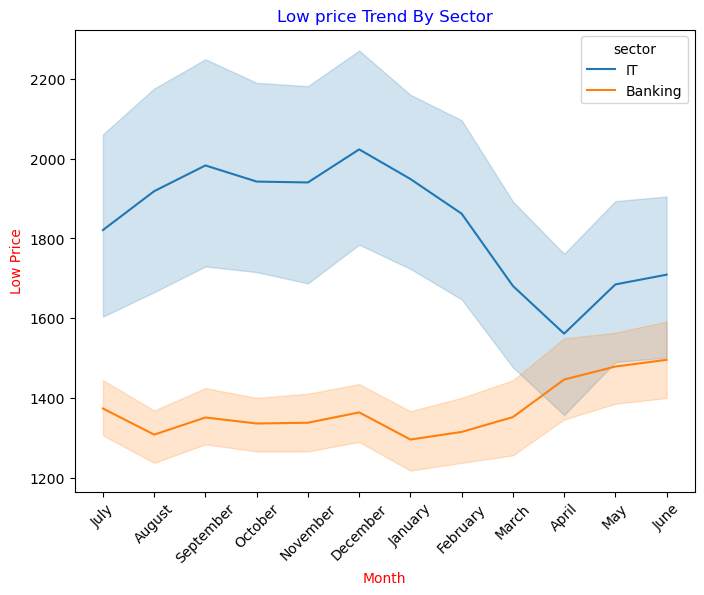

In [166]:
# Q10 Low price Trend for Banking and IT

plt.figure(figsize=(8,6))
sns.lineplot(df,x="month",y="low",hue="sector")
plt.title("Low price Trend By Sector",color="b")
plt.ylabel("Low Price",color="r")
plt.xlabel("Month",color="r")
plt.xticks(rotation=45)
plt.show()


#Observations
1. IT sector consistently had higher low prices than the Banking sector.

2. The volatility (shaded area) in the IT sector was much higher, indicating greater fluctuations in low prices.

3. The Banking sector showed more stability, with a narrower confidence interval.
4. Banking sector Maintained lower low prices than the IT sector throughout the year.

Text(0, 0.5, 'Daily Range')

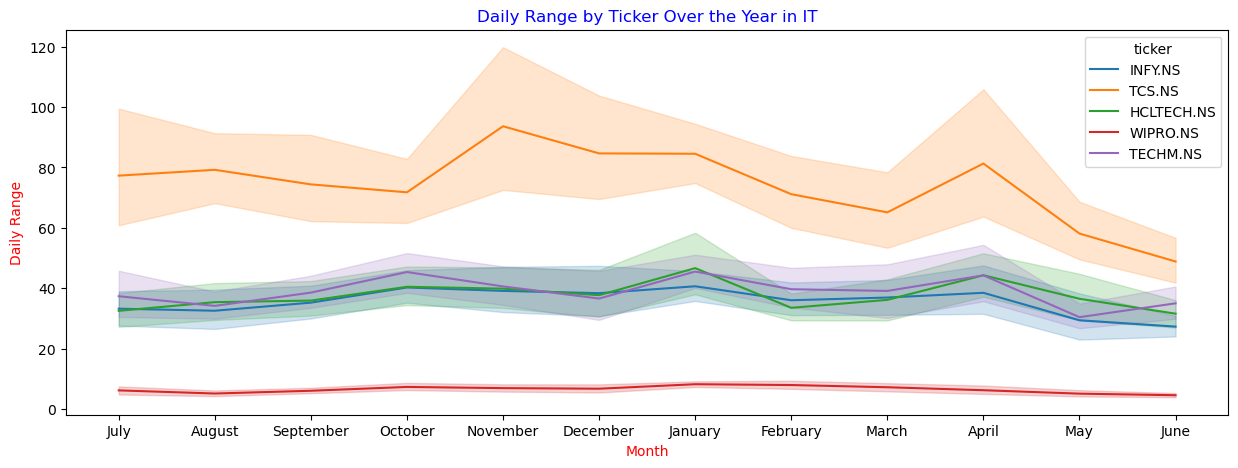

In [168]:
# Q 11 What is the Daily Range for all the tickers  in IT Sector
plt.figure(figsize=(15,5))

sns.lineplot(df_IT,x="month",y="daily_range",hue="ticker")
plt.title("Daily Range by Ticker Over the Year in IT",color="b")
plt.xlabel("Month",color="r")
plt.ylabel("Daily Range",color="r")



Text(0, 0.5, 'Daily Range')

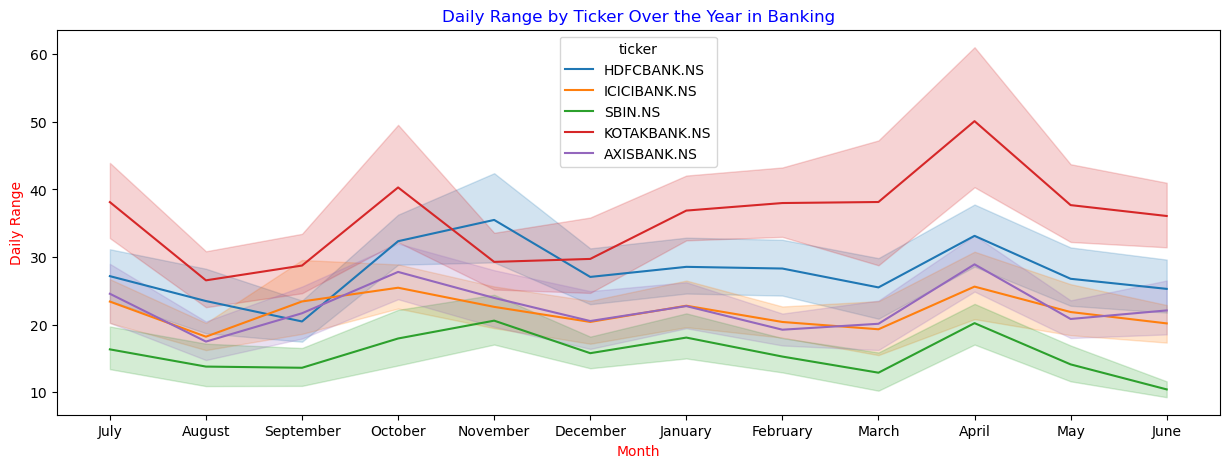

In [169]:
# Q 12 What is the Daily Range for all the tickers  in Banking Sector
plt.figure(figsize=(15,5))

sns.lineplot(df_Banking,x="month",y="daily_range",hue="ticker")
plt.title("Daily Range by Ticker Over the Year in Banking",color="b")
plt.xlabel("Month",color="r")
plt.ylabel("Daily Range",color="r")


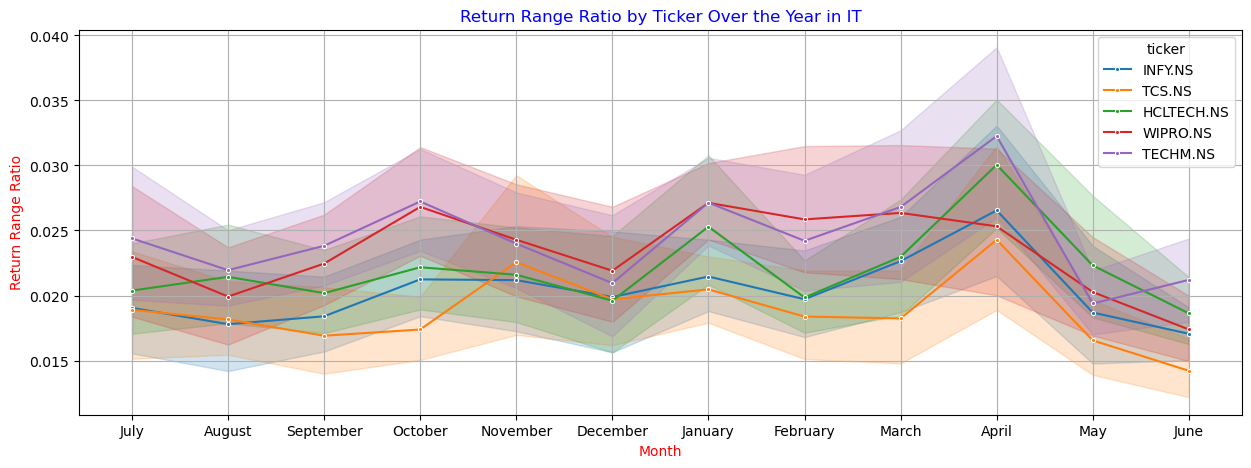

In [170]:
# Q 13 What is Return Range Ratio for  all the Tickers in IT
plt.figure(figsize=(15,5))

sns.lineplot(df_IT,x="month",y="return_range_ratio",hue="ticker",marker='.')
plt.title("Return Range Ratio by Ticker Over the Year in IT",color="b")
plt.xlabel("Month",color="r")
plt.ylabel("Return Range Ratio",color="r")
plt.grid(True)

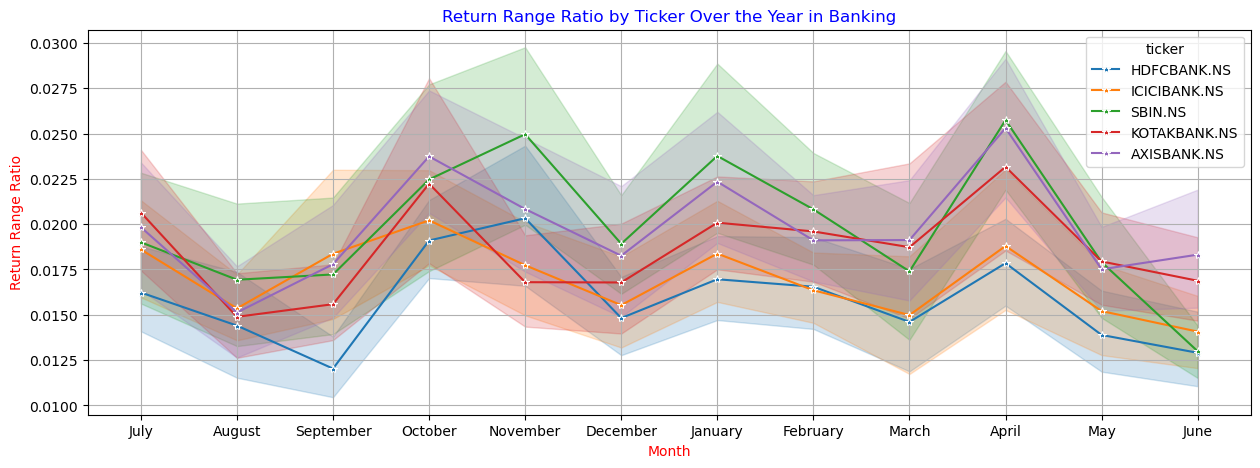

In [171]:
# Q 14 What is Return Range Ratio for  all the Tickers in Banking
plt.figure(figsize=(15,5))

sns.lineplot(df_Banking,x="month",y="return_range_ratio",hue="ticker",marker='*')
plt.title("Return Range Ratio by Ticker Over the Year in Banking",color="b")
plt.xlabel("Month",color="r")
plt.ylabel("Return Range Ratio",color="r")
plt.grid(True)

# Observations
**IT Sector**
1. Most IT stocks have a return range ratio between 0.02 and 0.03, showing moderate returns relative to price movement.

2. WIPRO.NS and HCLTECH.NS show slightly higher peaks, especially in April.

3. All IT stocks see a spike in April, suggesting higher volatility or returns during that month.

4. June sees a dip for all stocks, meaning returns dropped relative to their price ranges.

**Banking Sector**
1. Banking stocks mostly have a return range ratio between 0.01 and 0.025, which is lower than IT sector on average.

2. KOTAKBANK.NS and SBIN.NS show higher ratios, especially in March and April.

3. Just like IT, April shows a clear peak for almost all banking stocks.

4. HDFCBANK.NS and AXISBANK.NS have the lowest and most stable return range ratios over the year.



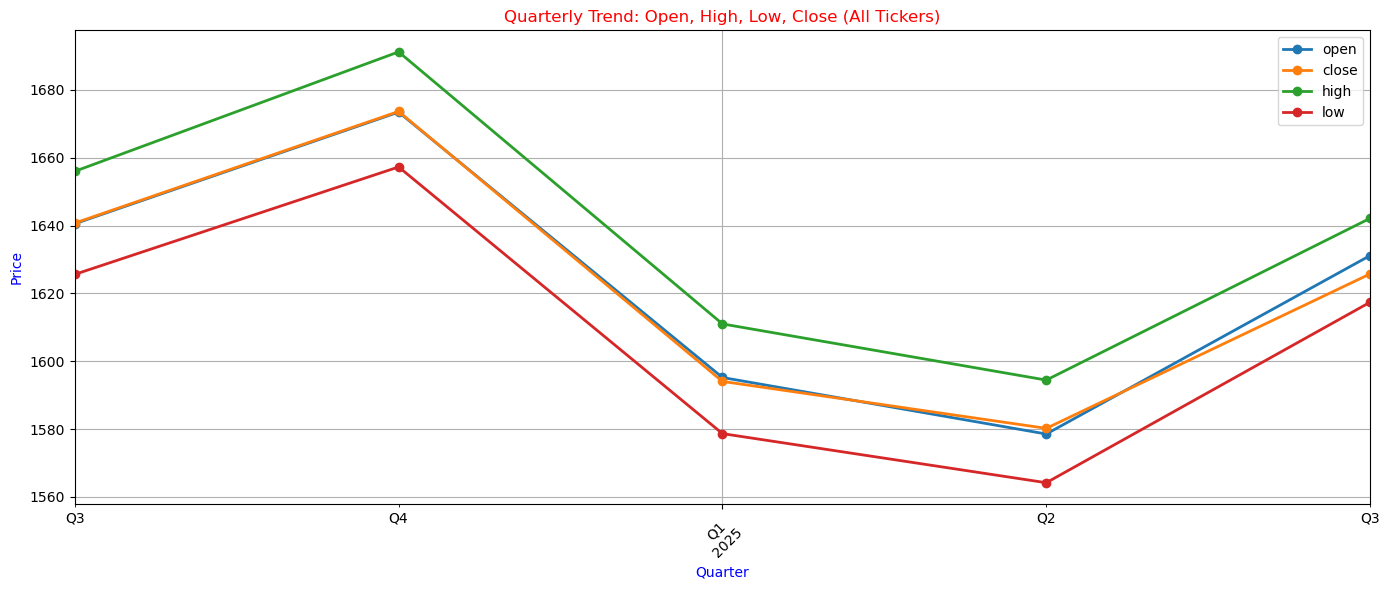

In [173]:
# Q 15 Comparions between Open,close, Low, High Price over Quarters
# add an explicit ‘quarter’ column and group on it
df['quarter'] = df['date'].dt.to_period('Q')        
df_market = (df.groupby('quarter')[['open','close','high','low']]
               .mean()
               .sort_index())
# Code for  Plot
ax = df_market.plot(figsize=(14,6), marker='o', linewidth=2)
ax.set_title('Quarterly Trend: Open, High, Low, Close (All Tickers)',color="r")
ax.set_ylabel('Price',color="b")
ax.set_xlabel('Quarter',color="b")
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

observation 
1. Price order is always the same: High is highest, Low is lowest, and Open and Close are in between and very close to each other.

2. Open and Close are almost equal: They are very close every quarter, meaning prices didn’t change much during the quarter.

3. Biggest price gain in Q4: Close price was much higher than Open, showing strong upward movement.

Lowest price changes in Q1 and Q2 2025: All price values were close to each other, meaning less market movement.

Prices started rising again in Q3 2025: All price types (Open, High, Low, Close) increased together, showing a balanced recovery.

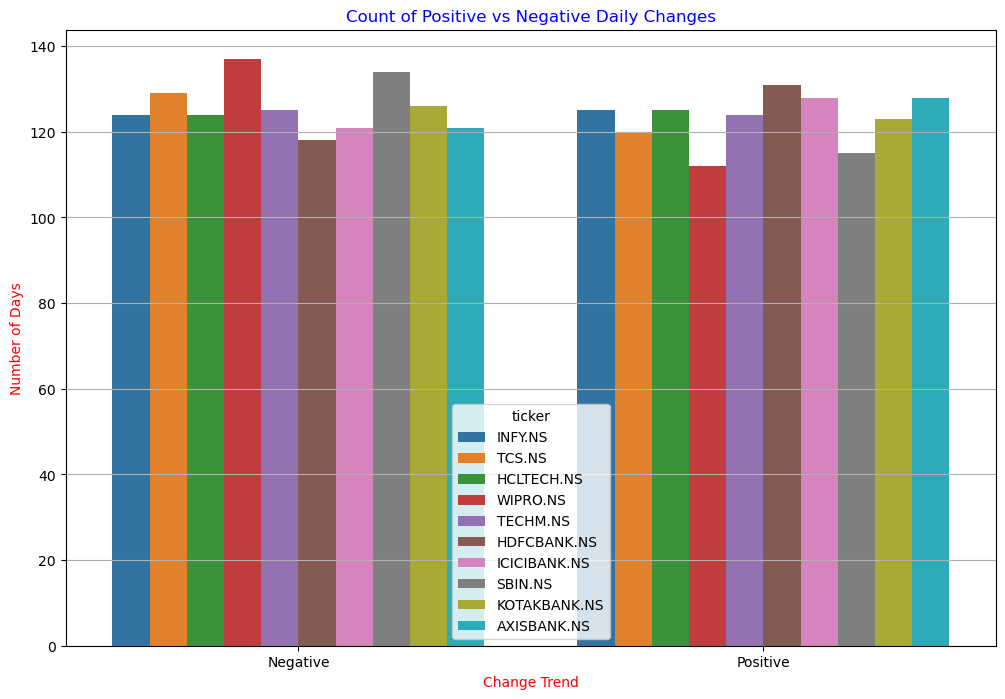

In [175]:
# Q 16 Positive and Negative Days by Tickers
df['change_trend'] = np.where(df['daily_change'] > 0, 'Positive', 'Negative')
# Code for plot
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='change_trend', hue='ticker',palette='tab10')

plt.title('Count of Positive vs Negative Daily Changes',color="b")
plt.xlabel('Change Trend',color="r")
plt.ylabel('Number of Days',color="r")
plt.grid(axis='y')
plt.show()


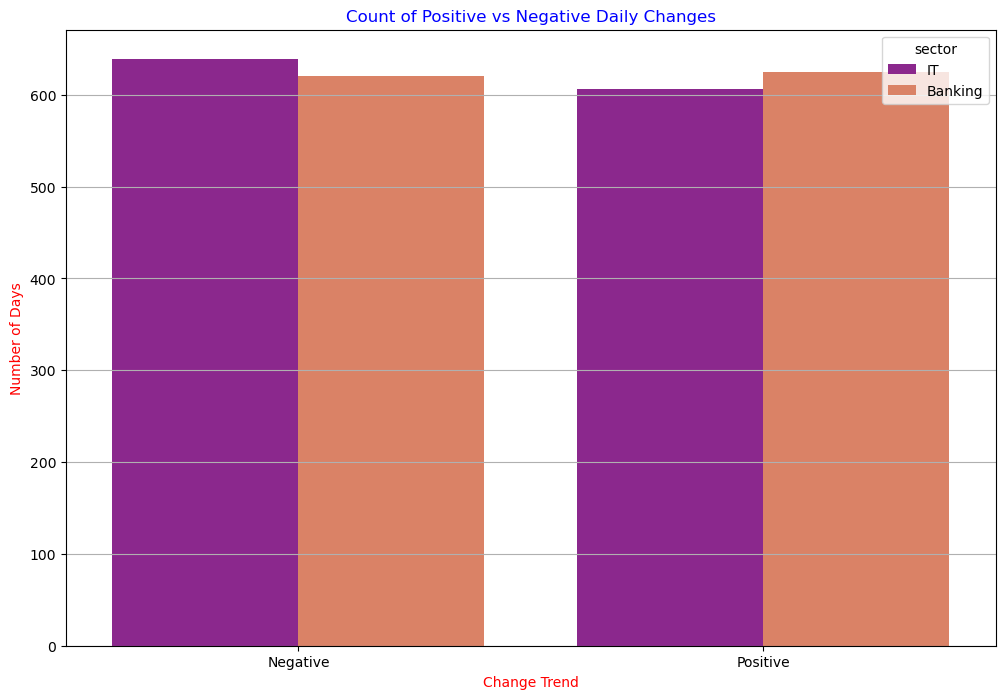

In [176]:
# Q 17 Total Positive and Negative days Over all Sector wise

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='change_trend', hue='sector',palette='plasma')

plt.title('Count of Positive vs Negative Daily Changes',color="b")
plt.xlabel('Change Trend',color="r")
plt.ylabel('Number of Days',color="r")
plt.grid(axis='y')
plt.show()


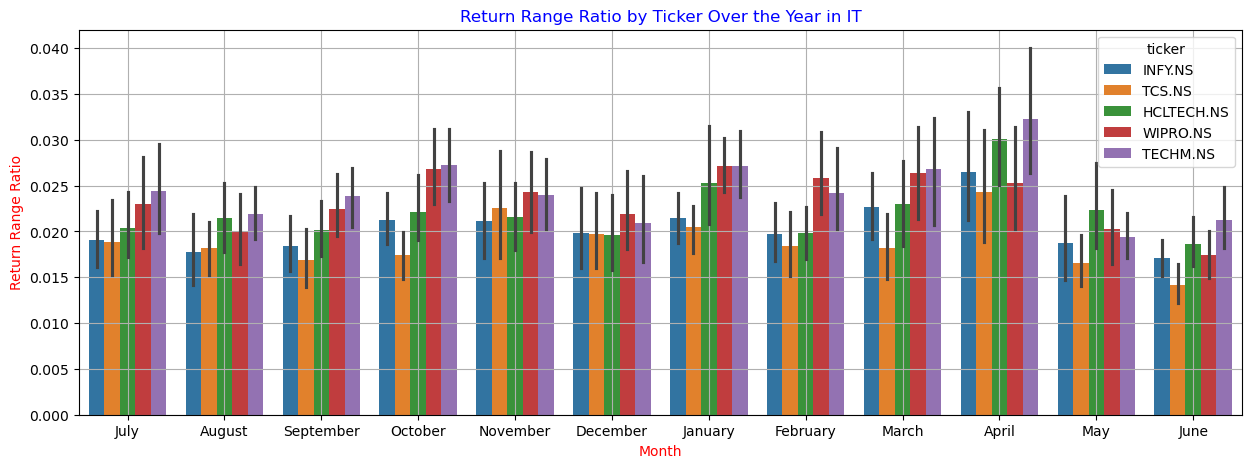

In [177]:
# Q 18 What is Return Range Ratio for  all the Tickers in IT
plt.figure(figsize=(15,5))

sns.barplot(df_IT,x="month",y="return_range_ratio",hue="ticker")
plt.title("Return Range Ratio by Ticker Over the Year in IT",color="b")
plt.xlabel("Month",color="r")
plt.ylabel("Return Range Ratio",color="r")
plt.grid(True)

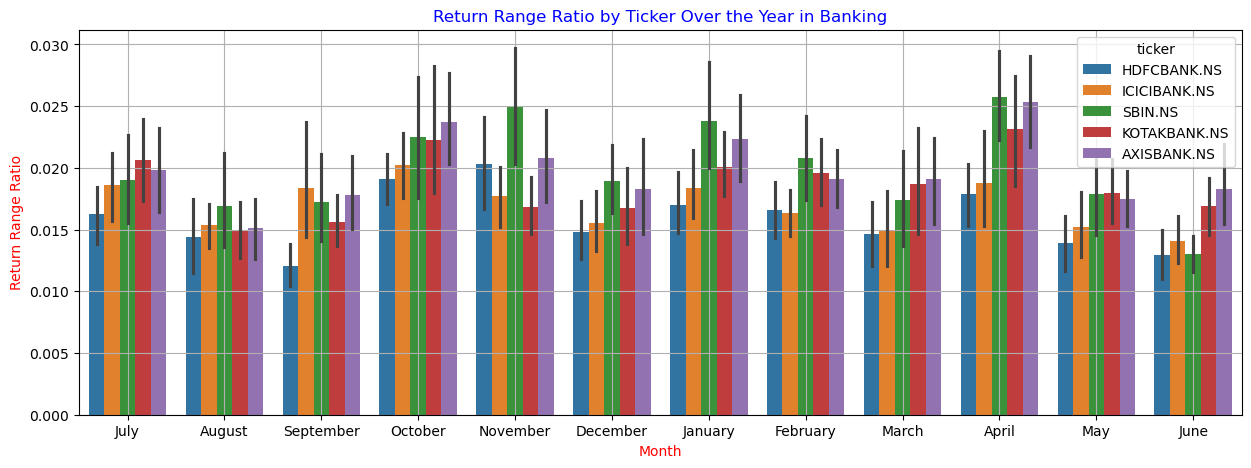

In [178]:
#  Q 19 What is Return Range Ratio for  all the Tickers in Banking
plt.figure(figsize=(15,5))

sns.barplot(df_Banking,x="month",y="return_range_ratio",hue="ticker")
plt.title("Return Range Ratio by Ticker Over the Year in Banking",color="b")
plt.xlabel("Month",color="r")
plt.ylabel("Return Range Ratio",color="r")
plt.grid(True)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2490 entries, 0 to 248
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ticker              2490 non-null   object        
 1   date                2490 non-null   datetime64[ns]
 2   open                2490 non-null   float64       
 3   high                2490 non-null   float64       
 4   low                 2490 non-null   float64       
 5   close               2490 non-null   float64       
 6   volume              2490 non-null   int64         
 7   day                 2490 non-null   object        
 8   month               2490 non-null   object        
 9   year                2490 non-null   int32         
 10  sector              2490 non-null   object        
 11  daily_change        2490 non-null   float64       
 12  pct_change          2489 non-null   float64       
 13  daily_range         2490 non-null   float64       
 14

#  DataFrame Column Overview (15 Columns)
ticker: Stock symbol (e.g., INFY.NS, SBIN.NS)

date: Trading date

open: Opening price of the stock

high: Highest price during the trading day

low: Lowest price during the trading day

close: Closing price of the stock

volume: Total number of shares traded

day: Day of the week (e.g., Monday)

month: Month name (e.g., January)

year: Year of the data record

sector: Sector of the company (e.g., IT, Banking)

daily_change: Price change from open to close

pct_change: Percentage change in price during the day

daily_range: Difference between high and low prices

return_range_ratio: Return relative to the daily price range

# Conclusions
1. IT sector stocks generally show higher daily and return range ratios, indicating more price movement and volatility compared to Banking stocks.

2. Banking sector stocks are relatively stable with lower daily ranges and more consistent returns.

3. There is a clear spike in price activity (range and return) for both sectors in April, possibly linked to market events like earnings season or financial year-end.

4. Return range ratio helps in understanding how effectively stocks convert price volatility into gains or losses — IT stocks show better return potential relative to their range.

5. TECHM.NS and ICICIBANK.NS are the most volatile within their respective sectors, indicating higher risk and potential return.



# Investor Suggestions.
1. Pick IT stocks (like TECHM.NS) if you want higher returns but are okay with more risk.

2. Choose Banking stocks (like HDFCBANK.NS) for stable and steady growth with less risk.

3. Watch April month, as it shows high activity — good for short-term opportunities.

4. Mix both sectors in your portfolio to balance risk and reward.

